In [1]:
import json, itertools, pprint
with open(r"C:\Users\vaish\Assessment_zeru\user-wallet-transactions.json") as f:
    for rec in itertools.islice(json.load(f), 3):
        pprint.pp(rec)
        

{'_id': {'$oid': '681d38fed63812d4655f571a'},
 'userWallet': '0x00000000001accfa9cef68cf5371a23025b6d4b6',
 'network': 'polygon',
 'protocol': 'aave_v2',
 'txHash': '0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190',
 'logId': '0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190_Deposit',
 'timestamp': 1629178166,
 'blockNumber': 1629178166,
 'action': 'deposit',
 'actionData': {'type': 'Deposit',
                'amount': '2000000000',
                'assetSymbol': 'USDC',
                'assetPriceUSD': '0.9938318274296357543568636362026045',
                'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174',
                'userId': '0x00000000001accfa9cef68cf5371a23025b6d4b6'},
 '__v': 0,
 'createdAt': {'$date': '2025-05-08T23:06:39.465Z'},
 'updatedAt': {'$date': '2025-05-08T23:06:39.465Z'}}
{'_id': {'$oid': '681aa70dd6df53021cc6f3c0'},
 'userWallet': '0x000000000051d07a4fb3bd10121a343d85818da6',
 'network': 'polygon',
 'protocol': 'aave_v2'

In [2]:
import pandas as pd
import numpy as np
json_path= r"C:\Users\vaish\Assessment_zeru\user-wallet-transactions.json"

In [3]:
with open(json_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [4]:
from pandas import json_normalize
clean_data = json_normalize(data)

In [5]:
df = pd.DataFrame(clean_data)
df.head()
df.columns

Index(['userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp',
       'blockNumber', 'action', '__v', '_id.$oid', 'actionData.type',
       'actionData.amount', 'actionData.assetSymbol',
       'actionData.assetPriceUSD', 'actionData.poolId', 'actionData.userId',
       'createdAt.$date', 'updatedAt.$date', 'actionData.toId',
       'actionData.borrowRateMode', 'actionData.borrowRate',
       'actionData.variableTokenDebt', 'actionData.stableTokenDebt',
       'actionData.callerId', 'actionData.useATokens', 'actionData.repayerId',
       'actionData.liquidatorId', 'actionData.collateralAmount',
       'actionData.collateralAssetPriceUSD', 'actionData.principalAmount',
       'actionData.borrowAssetPriceUSD', 'actionData.collateralReserveId',
       'actionData.collateralReserveSymbol', 'actionData.principalReserveId',
       'actionData.principalReserveSymbol'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   userWallet                          100000 non-null  object 
 1   network                             100000 non-null  object 
 2   protocol                            100000 non-null  object 
 3   txHash                              100000 non-null  object 
 4   logId                               100000 non-null  object 
 5   timestamp                           100000 non-null  int64  
 6   blockNumber                         100000 non-null  int64  
 7   action                              100000 non-null  object 
 8   __v                                 100000 non-null  int64  
 9   _id.$oid                            100000 non-null  object 
 10  actionData.type                     100000 non-null  object 
 11  actionData.amount          

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['createdAt'] = pd.to_datetime(df['createdAt.$date'])
df['updatedAt'] = pd.to_datetime(df['updatedAt.$date'])


In [ ]:
df.drop(columns=['_id.$oid', '__v'], inplace=True, errors='ignore')


In [ ]:
df.head()  

,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData.type,actionData.amount,...,actionData.collateralAmount,actionData.collateralAssetPriceUSD,actionData.principalAmount,actionData.borrowAssetPriceUSD,actionData.collateralReserveId,actionData.collateralReserveSymbol,actionData.principalReserveId,actionData.principalReserveSymbol,createdAt,updatedAt
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,Deposit,2000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-08 23:06:39.465000+00:00,2025-05-08 23:06:39.465000+00:00
1,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,Deposit,145000000000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-07 00:19:26.159000+00:00,2025-05-07 00:19:26.159000+00:00
2,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,Deposit,1000000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-08 19:23:47.877000+00:00,2025-05-08 19:23:47.877000+00:00
3,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,Deposit,4000000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-08 20:25:33.141000+00:00,2025-05-08 20:25:33.141000+00:00
4,0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,RedeemUnderlying,501548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-05 10:58:45.934000+00:00,2025-05-05 10:58:45.934000+00:00


In [10]:
df['actionData.amount'] = pd.to_numeric(df['actionData.amount'], errors='coerce')
df['actionData.assetPriceUSD'] = pd.to_numeric(df['actionData.assetPriceUSD'], errors='coerce')

In [11]:
df['usd_value']= df['actionData.amount']* df['actionData.assetPriceUSD']

In [ ]:
df.describe(include='all')  

,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData.type,actionData.amount,...,actionData.collateralAssetPriceUSD,actionData.principalAmount,actionData.borrowAssetPriceUSD,actionData.collateralReserveId,actionData.collateralReserveSymbol,actionData.principalReserveId,actionData.principalReserveSymbol,createdAt,updatedAt,usd_value
count,100000,100000,100000,100000,100000,100000,1.000000e+05,100000,100000,1.000000e+05,...,248,248,248,248,248,248,248,100000,100000,1.000000e+05
unique,3497,1,1,96707,99213,NaN,NaN,5,5,NaN,...,234,248,240,6,7,6,7,NaN,NaN,NaN
top,0x05c9db563db8e38cc2899297da41ce430b61a484,polygon,aave_v2,0xed8fb7651426706ec1d67ac8572cba099f2c114ce843...,0xed8fb7651426706ec1d67ac8572cba099f2c114ce843...,NaN,NaN,deposit,Deposit,NaN,...,0.7721441995716452957211920929349274,875179341,1.027301921528701526488629005080062,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,WMATIC,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,USDC,NaN,NaN,NaN
freq,14265,100000,100000,10,5,NaN,NaN,37808,37808,NaN,...,4,1,2,116,98,97,97,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2021-06-17 00:55:30.034620160,1.623891e+09,NaN,NaN,6.544795e+21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-09 07:04:20.687979264+00:00,2025-05-09 07:04:20.687979264+00:00,1.167114e+22
min,NaN,NaN,NaN,NaN,NaN,2021-03-31 17:00:04,1.617210e+09,NaN,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-05 10:48:32.434000+00:00,2025-05-05 10:48:32.434000+00:00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2021-05-21 08:21:36.500000,1.621585e+09,NaN,NaN,2.347008e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-07 00:28:31.064499968+00:00,2025-05-07 00:28:31.064499968+00:00,4.997491e+08
50%,NaN,NaN,NaN,NaN,NaN,2021-06-11 12:43:53,1.623415e+09,NaN,NaN,5.204440e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-08 10:17:53.068999936+00:00,2025-05-08 10:17:53.068999936+00:00,7.331946e+12
75%,NaN,NaN,NaN,NaN,NaN,2021-07-12 02:29:14,1.626057e+09,NaN,NaN,2.499973e+19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-08 17:08:45.219500032+00:00,2025-05-08 17:08:45.219500032+00:00,1.959414e+20
max,NaN,NaN,NaN,NaN,NaN,2021-09-02 17:54:35,1.630605e+09,NaN,NaN,1.273000e+25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-18 08:41:26.079000+00:00,2025-06-18 08:41:26.079000+00:00,1.274226e+25


In [ ]:
df.isnull().sum() 

userWallet                                 0
network                                    0
protocol                                   0
txHash                                     0
logId                                      0
timestamp                                  0
blockNumber                                0
action                                     0
actionData.type                            0
actionData.amount                          0
actionData.assetSymbol                     0
actionData.assetPriceUSD                   0
actionData.poolId                          0
actionData.userId                          0
createdAt.$date                            0
updatedAt.$date                            0
actionData.toId                        67695
actionData.borrowRateMode             100000
actionData.borrowRate                  82914
actionData.variableTokenDebt           82914
actionData.stableTokenDebt             82914
actionData.callerId                    82914
actionData

In [ ]:
df_sorted = df.sort_values(['userWallet', 'actionData.toId', 'timestamp'])

df_sorted['toId_time_diff'] = df_sorted.groupby(['userWallet', 'actionData.toId'])['timestamp'].diff()

avg_toid_spacing = (
    df_sorted.groupby('userWallet')['toId_time_diff']
    .mean()
    .fillna(0)
    .rename('avg_toId_spacing_secs')
)
df_sorted['toId_time_diff'] = df_sorted['toId_time_diff'].fillna(0)


In [ ]:
df_sorted['toId_time_diff'].isna().sum()  

0

In [16]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   userWallet                          100000 non-null  object             
 1   network                             100000 non-null  object             
 2   protocol                            100000 non-null  object             
 3   txHash                              100000 non-null  object             
 4   logId                               100000 non-null  object             
 5   timestamp                           100000 non-null  datetime64[ns]     
 6   blockNumber                         100000 non-null  int64              
 7   action                              100000 non-null  object             
 8   actionData.type                     100000 non-null  object             
 9   actionData.amount               

In [ ]:
df_sorted.isnull().sum()  

userWallet                                 0
network                                    0
protocol                                   0
txHash                                     0
logId                                      0
timestamp                                  0
blockNumber                                0
action                                     0
actionData.type                            0
actionData.amount                          0
actionData.assetSymbol                     0
actionData.assetPriceUSD                   0
actionData.poolId                          0
actionData.userId                          0
createdAt.$date                            0
updatedAt.$date                            0
actionData.toId                        67695
actionData.borrowRateMode             100000
actionData.borrowRate                  82914
actionData.variableTokenDebt           82914
actionData.stableTokenDebt             82914
actionData.callerId                    82914
actionData

In [18]:
df_sorted["actionData.borrowRate"]
df_sorted["borrowRate"] = pd.to_numeric(df_sorted["actionData.borrowRate"], errors='coerce') / 1e27


In [ ]:
fill_zero_cols = [
    "actionData.borrowRate", 
    "actionData.stableTokenDebt", 
    "actionData.variableTokenDebt", 
    "actionData.collateralAmount", 
    "actionData.collateralAssetPriceUSD", 
    "actionData.principalAmount", 
    "actionData.borrowAssetPriceUSD"
]

df_sorted[fill_zero_cols] = df_sorted[fill_zero_cols].fillna(0.0)

id_cols = [
    "actionData.liquidatorId", 
    "actionData.repayerId", 
    "actionData.callerId"
]
df_sorted[id_cols] = df_sorted[id_cols].fillna("none")


In [20]:
df_sorted[fill_zero_cols].dtypes


actionData.borrowRate                 object
actionData.stableTokenDebt            object
actionData.variableTokenDebt          object
actionData.collateralAmount           object
actionData.collateralAssetPriceUSD    object
actionData.principalAmount            object
actionData.borrowAssetPriceUSD        object
dtype: object

In [21]:
for col in fill_zero_cols:
    df_sorted[col] = pd.to_numeric(df_sorted[col], errors='coerce')


In [22]:
df_sorted[fill_zero_cols] = df_sorted[fill_zero_cols].fillna(0.0)


In [23]:
credit_features = df_sorted.groupby("userWallet")[fill_zero_cols].agg("sum").reset_index()


In [24]:
credit_features

,userWallet,actionData.borrowRate,actionData.stableTokenDebt,actionData.variableTokenDebt,actionData.collateralAmount,actionData.collateralAssetPriceUSD,actionData.principalAmount,actionData.borrowAssetPriceUSD
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0x000000000051d07a4fb3bd10121a343d85818da6,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3,0x0000000000e189dd664b9ab08a33c4839953852c,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,1.657579e+27,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,6.948030e+25,0.0,0.0,0.0,0.0,0.0,0.0
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,7.318306e+25,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_sorted["actionData.borrowRateMode"].value_counts()
df_sorted.drop(columns=['actionData.borrowRateMode'], inplace=True, errors='ignore')

In [26]:
df_sorted = df.sort_values(by=['userWallet', 'actionData.toId', 'timestamp'])


In [27]:
cols_to_convert = [
    "actionData.borrowRate",
    "actionData.stableTokenDebt",
    "actionData.variableTokenDebt",
    "actionData.collateralAmount",
    "actionData.collateralAssetPriceUSD",
    "actionData.principalAmount",
    "actionData.borrowAssetPriceUSD"
]


In [ ]:
df_sorted[cols_to_convert] = df_sorted[cols_to_convert].apply(pd.to_numeric, errors='coerce')

borrow_agg = (
    df_sorted.groupby("userWallet")[cols_to_convert]
    .agg(["sum", "mean", "max", "count"])
    .fillna(0)
)
borrow_agg.columns = ['_'.join(col) for col in borrow_agg.columns]
borrow_agg = borrow_agg.reset_index()


In [ ]:
df['toId_time_diff'] = df.groupby(['userWallet', 'actionData.toId'])['timestamp'].diff().dt.total_seconds()

avg_toid_spacing = (
    df.groupby('userWallet')['toId_time_diff']
    .mean()
    .fillna(0)
    .rename('avg_toId_spacing_secs')
)


In [ ]:
repeat_toid_count = (
    df.groupby(['userWallet', 'actionData.toId'])
    .size()
    .reset_index(name='tx_count')
    .query('tx_count > 1')
    .groupby('userWallet')
    .size()
    .rename('repeat_toId_interaction_count')
)


In [ ]:
top_10_toids = df['actionData.toId'].value_counts().head(10).index

df['to_common_toId'] = df['actionData.toId'].isin(top_10_toids).astype(int)

tx_to_common_toid = (
    df.groupby('userWallet')['to_common_toId']
    .sum()
    .rename('tx_to_common_toId')
)


In [ ]:
wallet_features = pd.DataFrame(df['userWallet'].unique(), columns=['userWallet'])

wallet_features = (
    wallet_features
    .merge(avg_toid_spacing, on='userWallet', how='left')
    .merge(repeat_toid_count, on='userWallet', how='left')
    .merge(tx_to_common_toid, on='userWallet', how='left')
)

wallet_features.fillna(0, inplace=True)


In [ ]:
wallet_features.head() 

,userWallet,avg_toId_spacing_secs,repeat_toId_interaction_count,tx_to_common_toId
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0.000000,0.0,0
1,0x000000000051d07a4fb3bd10121a343d85818da6,0.000000,0.0,0
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0.000000,0.0,0
3,0x0000000000e189dd664b9ab08a33c4839953852c,698363.062500,1.0,0
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,84265.651163,1.0,0


In [34]:
wallet_base = df.groupby('userWallet').agg(
    tx_count=('txHash', 'count'),
    total_usd_value=('usd_value', 'sum'),
    avg_usd_value=('usd_value', 'mean'),
    active_days=('timestamp', lambda x: (x.max() - x.min()).days),
    num_borrows=('action', lambda x: (x == 'borrow').sum()),
    num_repays=('action', lambda x: (x == 'repay').sum()),
    num_liquidations=('action', lambda x: (x == 'liquidationcall').sum()),
    num_deposits=('action', lambda x: (x == 'deposit').sum())
).reset_index()


In [35]:
final_df = (
    wallet_base
    .merge(wallet_features, on='userWallet', how='left')
)


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.tz_localize(None)
df['createdAt'] = pd.to_datetime(df['createdAt']).dt.tz_localize(None)
df['updatedAt'] = pd.to_datetime(df['updatedAt']).dt.tz_localize(None)

df['created_lag'] = (df['createdAt'] - df['timestamp']).dt.total_seconds()
df['updated_lag'] = (df['updatedAt'] - df['timestamp']).dt.total_seconds()

lag_features = df.groupby('userWallet').agg(
    avg_created_lag=('created_lag', 'mean'),
    max_created_lag=('created_lag', 'max'),
    avg_updated_lag=('updated_lag', 'mean'),
    max_updated_lag=('updated_lag', 'max')
).reset_index()

final_df = final_df.merge(lag_features, on='userWallet', how='left')


In [ ]:
final_df.info()

final_df.isna().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userWallet                     3497 non-null   object 
 1   tx_count                       3497 non-null   int64  
 2   total_usd_value                3497 non-null   float64
 3   avg_usd_value                  3497 non-null   float64
 4   active_days                    3497 non-null   int64  
 5   num_borrows                    3497 non-null   int64  
 6   num_repays                     3497 non-null   int64  
 7   num_liquidations               3497 non-null   int64  
 8   num_deposits                   3497 non-null   int64  
 9   avg_toId_spacing_secs          3497 non-null   float64
 10  repeat_toId_interaction_count  3497 non-null   float64
 11  tx_to_common_toId              3497 non-null   int32  
 12  avg_created_lag                3497 non-null   f

userWallet                       0
tx_count                         0
total_usd_value                  0
avg_usd_value                    0
active_days                      0
num_borrows                      0
num_repays                       0
num_liquidations                 0
num_deposits                     0
avg_toId_spacing_secs            0
repeat_toId_interaction_count    0
tx_to_common_toId                0
avg_created_lag                  0
max_created_lag                  0
avg_updated_lag                  0
max_updated_lag                  0
dtype: int64

In [38]:
final_df = final_df.merge(borrow_agg, on="userWallet", how="left").fillna(0)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

score_features = [
    'tx_count', 'total_usd_value', 'avg_usd_value',
    'num_borrows', 'num_repays', 'num_liquidations',
    'avg_toId_spacing_secs', 'repeat_toId_interaction_count',
    'tx_to_common_toId', 'avg_created_lag', 'max_created_lag',
    'actionData.borrowRate_mean', 'actionData.variableTokenDebt_sum',
    'actionData.collateralAmount_sum', 'actionData.principalAmount_sum'
]

scaler = MinMaxScaler()
scaled_feats = scaler.fit_transform(final_df[score_features])
scaled_df = pd.DataFrame(scaled_feats, columns=score_features)

for col in score_features:
    final_df[f'scaled_{col}'] = scaled_df[col]


In [ ]:
final_df['credit_score_raw'] = (
    final_df['scaled_tx_count'] * 0.15 +
    final_df['scaled_total_usd_value'] * 0.15 +
    final_df['scaled_num_borrows'] * 0.1 +
    final_df['scaled_num_repays'] * 0.1 +
    final_df['scaled_repeat_toId_interaction_count'] * 0.1 +
    final_df['scaled_tx_to_common_toId'] * 0.05 +
    final_df['scaled_avg_created_lag'] * 0.05 +
    final_df['scaled_avg_toId_spacing_secs'] * 0.05 +
    final_df['scaled_actionData.variableTokenDebt_sum'] * 0.05 +
    final_df['scaled_actionData.collateralAmount_sum'] * 0.05 +
    final_df['scaled_actionData.principalAmount_sum'] * 0.05 +
    final_df['scaled_actionData.borrowRate_mean'] * 0.05
)


In [76]:
final_df['credit_score'] = MinMaxScaler(feature_range=(0, 1000)) \
    .fit_transform(final_df[['credit_score_raw']])


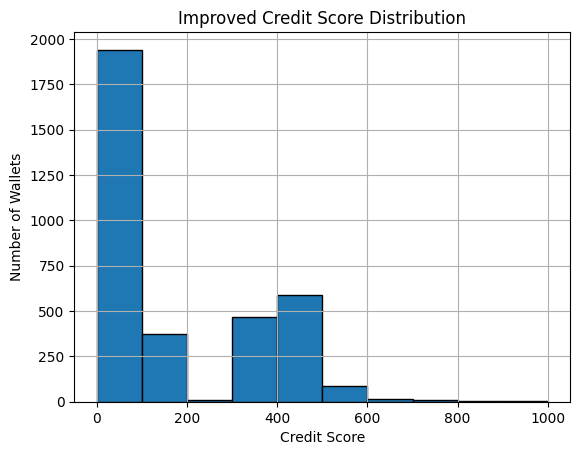

In [42]:
import matplotlib.pyplot as plt

plt.hist(final_df['credit_score'], bins=10, edgecolor='black')
plt.title('Improved Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.show()


In [43]:
final_df[['userWallet', 'credit_score']].to_csv("wallet_credit_scores.csv", index=False)


In [44]:
def score_to_label(score):
    if score < 300:
        return 'low'
    elif score < 600:
        return 'medium'
    else:
        return 'high'

final_df['risk_class'] = final_df['credit_score'].apply(score_to_label)


In [45]:
df['actionData.borrowRate']


0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
                    ...            
99995                           NaN
99996                           NaN
99997                           NaN
99998    27887841015204532581235931
99999    38912609704025765648166331
Name: actionData.borrowRate, Length: 100000, dtype: object

In [46]:
df['has_borrow_rate'] = df['actionData.borrowRate'].notna().astype(int)


In [47]:
borrow_presence = df.groupby('userWallet')['has_borrow_rate'].sum().reset_index()
borrow_presence.rename(columns={'has_borrow_rate': 'borrow_rate_presence'}, inplace=True)


In [48]:
borrow_presence['borrow_rate_presence'] = (borrow_presence['borrow_rate_presence'] > 0).astype(int)


In [49]:
final_df = final_df.merge(borrow_presence, on='userWallet', how='left')
final_df['borrow_rate_presence'] = final_df['borrow_rate_presence'].fillna(0).astype(int)


In [50]:
cols = [
    'actionData.collateralAmount',
    'actionData.variableTokenDebt',
    'actionData.stableTokenDebt',
    'actionData.principalAmount',
    'actionData.borrowRate'
]


In [ ]:
for col in cols:
    flag_col = f'has_{col.split(".")[-1]}'
    df[flag_col] = df[col].notna().astype(int)

activity_flags = df.groupby('userWallet')[[f'has_{col.split(".")[-1]}' for col in cols]].sum().reset_index()

for col in activity_flags.columns:
    if col != 'userWallet':
        activity_flags[col] = (activity_flags[col] > 0).astype(int)


In [52]:
final_df = final_df.merge(activity_flags, on='userWallet', how='left')


In [ ]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 68 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   userWallet                                3497 non-null   object 
 1   tx_count                                  3497 non-null   int64  
 2   total_usd_value                           3497 non-null   float64
 3   avg_usd_value                             3497 non-null   float64
 4   active_days                               3497 non-null   int64  
 5   num_borrows                               3497 non-null   int64  
 6   num_repays                                3497 non-null   int64  
 7   num_liquidations                          3497 non-null   int64  
 8   num_deposits                              3497 non-null   int64  
 9   avg_toId_spacing_secs                     3497 non-null   float64
 10  repeat_toId_interaction_count       

In [54]:
final_df.to_csv("final_wallet_features.csv", index=False)

In [55]:
final_df["num_borrows"].value_counts().sum()

3497

In [56]:
final_df.shape

(3497, 68)

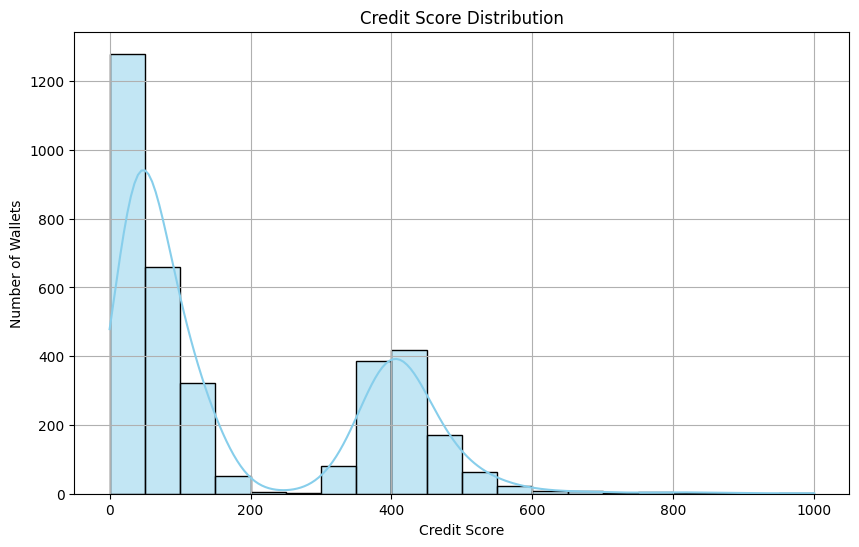

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(final_df['credit_score'], bins=20, kde=True, color='skyblue')
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()


In [58]:
final_df[final_df['credit_score'] < 1][['tx_count', 'num_borrows', 'total_usd_value']].describe()


,tx_count,num_borrows,total_usd_value
count,3.0,3.0,3.000000e+00
mean,1.0,0.0,1.601600e+17
std,0.0,0.0,2.774032e+17
min,1.0,0.0,1.001119e+08
25%,1.0,0.0,1.224666e+12
50%,1.0,0.0,2.449232e+12
75%,1.0,0.0,2.402400e+17
max,1.0,0.0,4.804776e+17


In [59]:
final_df[final_df['credit_score'] < 1].shape[0]


3

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = final_df.drop(columns=["userWallet", "credit_score", "credit_score_raw", "risk_class"])
y = final_df["credit_score"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [61]:
print(df.columns.tolist())


['userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData.type', 'actionData.amount', 'actionData.assetSymbol', 'actionData.assetPriceUSD', 'actionData.poolId', 'actionData.userId', 'createdAt.$date', 'updatedAt.$date', 'actionData.toId', 'actionData.borrowRateMode', 'actionData.borrowRate', 'actionData.variableTokenDebt', 'actionData.stableTokenDebt', 'actionData.callerId', 'actionData.useATokens', 'actionData.repayerId', 'actionData.liquidatorId', 'actionData.collateralAmount', 'actionData.collateralAssetPriceUSD', 'actionData.principalAmount', 'actionData.borrowAssetPriceUSD', 'actionData.collateralReserveId', 'actionData.collateralReserveSymbol', 'actionData.principalReserveId', 'actionData.principalReserveSymbol', 'createdAt', 'updatedAt', 'usd_value', 'toId_time_diff', 'to_common_toId', 'created_lag', 'updated_lag', 'has_borrow_rate', 'has_collateralAmount', 'has_variableTokenDebt', 'has_stableTokenDebt', 'has_principalAmount', 'ha

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression:
R² Score: 1.0
MAE: 2.694924442333705e-13
RMSE: 9.516243082951501e-13


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=150,     
    max_depth=8,          
    random_state=42 )
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))



Random Forest Regressor:
R² Score: 0.9786518004486222
MAE: 5.868258725868022
RMSE: 26.194552330380983


In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,    
    learning_rate=0.05,   
    max_depth=4,         
    random_state=42     
)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("\nGradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))



Gradient Boosting Regressor:
R² Score: 0.9820767385395762
MAE: 4.535191432726929
RMSE: 24.001527061900628


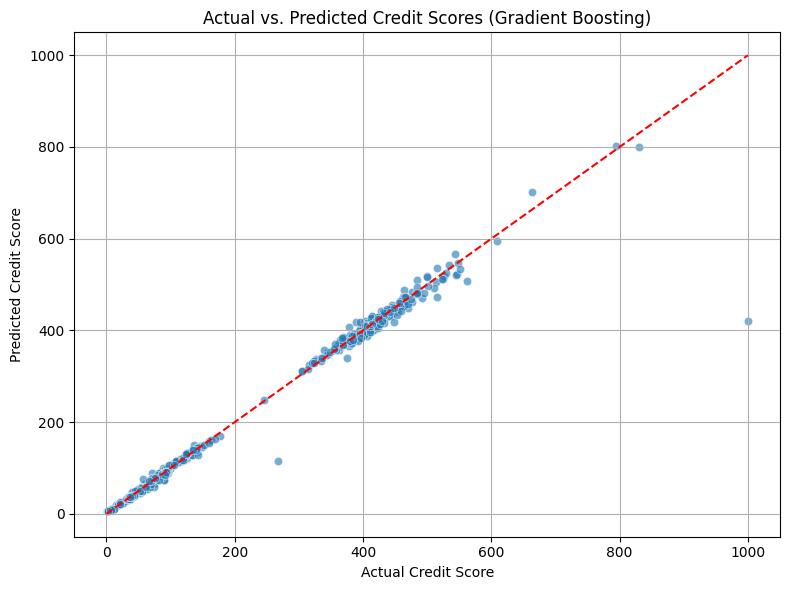

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--')  
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual vs. Predicted Credit Scores (Gradient Boosting)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\vaish\AppData\Local\Temp\ipykernel_17688\695270235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='importance', y='feature', palette='Blues_d')


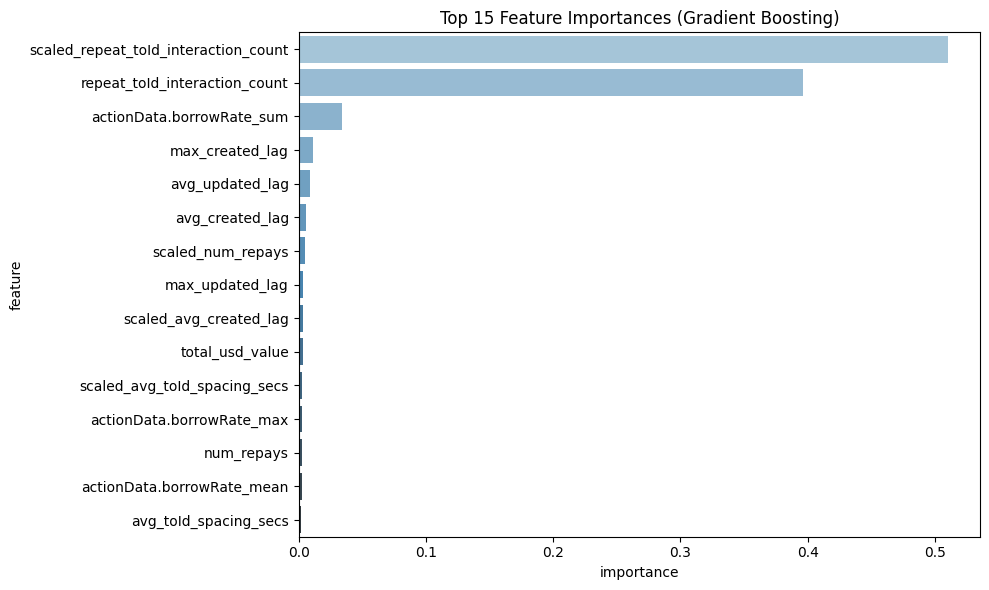

In [ ]:
importances = gb_model.feature_importances_
feature_names = X.columns 

feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='importance', y='feature', palette='Blues_d')
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.tight_layout()
plt.show()


In [72]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

combined = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

combined.fit(X_train, y_train)
y_pred_stack = combined.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
print("Stacked Model R²:", r2_score(y_test, y_pred_stack))
print("MAE:", mean_absolute_error(y_test, y_pred_stack))
print("RMSE:", root_mean_squared_error(y_test, y_pred_stack))


Stacked Model R²: 0.982190243475644
MAE: 5.257275684858659
RMSE: 23.92540758358685


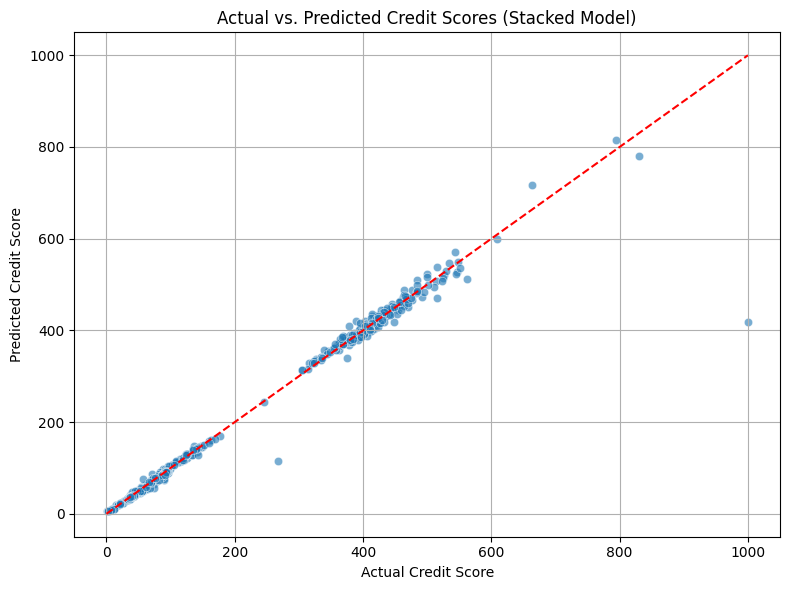

In [ ]:

y_pred_stack = combined.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_stack, alpha=0.6)
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--') 
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual vs. Predicted Credit Scores (Stacked Model)")
plt.grid(True)
plt.tight_layout()
plt.show()


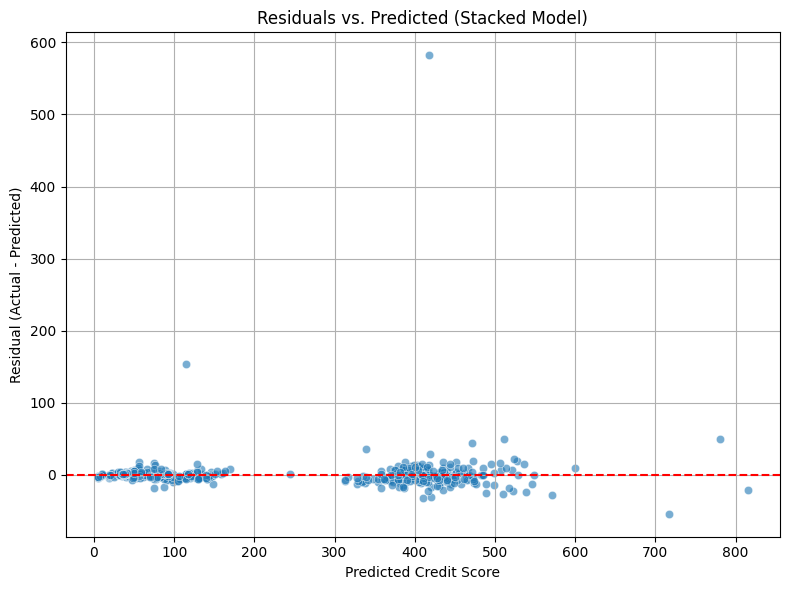

In [74]:
residuals = y_test - y_pred_stack

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_stack, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Credit Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs. Predicted (Stacked Model)")
plt.grid(True)
plt.tight_layout()
plt.show()


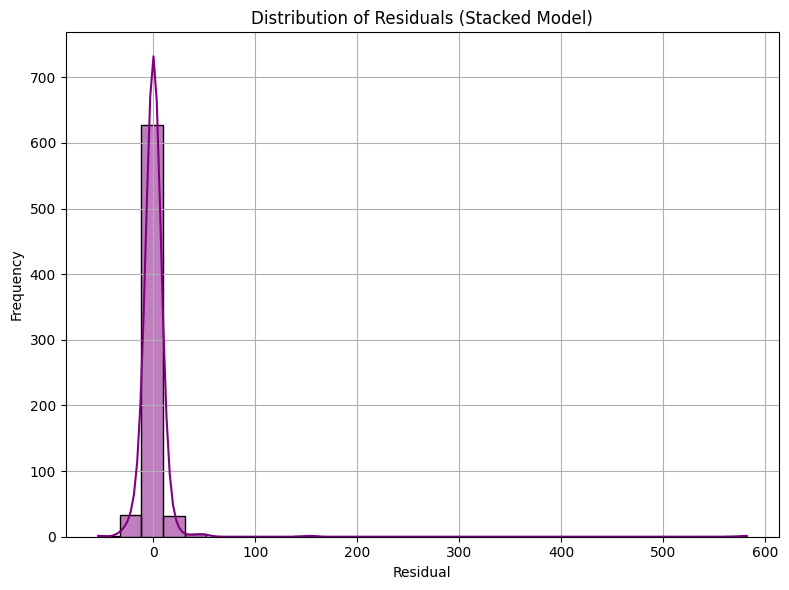

In [75]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals (Stacked Model)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(combined, 'stacked_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
